In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
# survival 0 = No, 1 = Yes
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let us see how many null values are present in each column

null_counts = data.isnull().sum()
null_counts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# let us see how many unique tickets there are

unique_tickets = data['Ticket'].nunique()
unique_tickets

681

In [5]:
# let us drop some useless columns

data_without_columns = data.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis = 1)
data_without_columns.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [6]:
# since age has a lot of missing values we can replace it with the mean

data_without_columns['Age'] = data_without_columns['Age'].fillna(data_without_columns['Age'].median())
data_without_columns.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [7]:
data_encoded = pd.get_dummies(data_without_columns, drop_first=True)
data_encoded.head()

,Survived,Pclass,Age,Sex_male
0,0,3,22.0,True
1,1,1,38.0,False
2,1,3,26.0,False
3,1,1,35.0,False
4,0,3,35.0,True


In [8]:
# let us shuffle the data

data_shuffled = data_encoded.sample(frac = 1)
data_shuffled.head()

,Survived,Pclass,Age,Sex_male
785,0,3,25.0,True
148,0,2,36.5,True
792,0,3,28.0,False
771,0,3,48.0,True
66,1,2,29.0,False


In [9]:
# let us define X and Y

X = data_shuffled.drop('Survived', axis = 1)
Y = data_shuffled['Survived']
print(X.shape)
print(Y.shape)

(891, 3)
(891,)


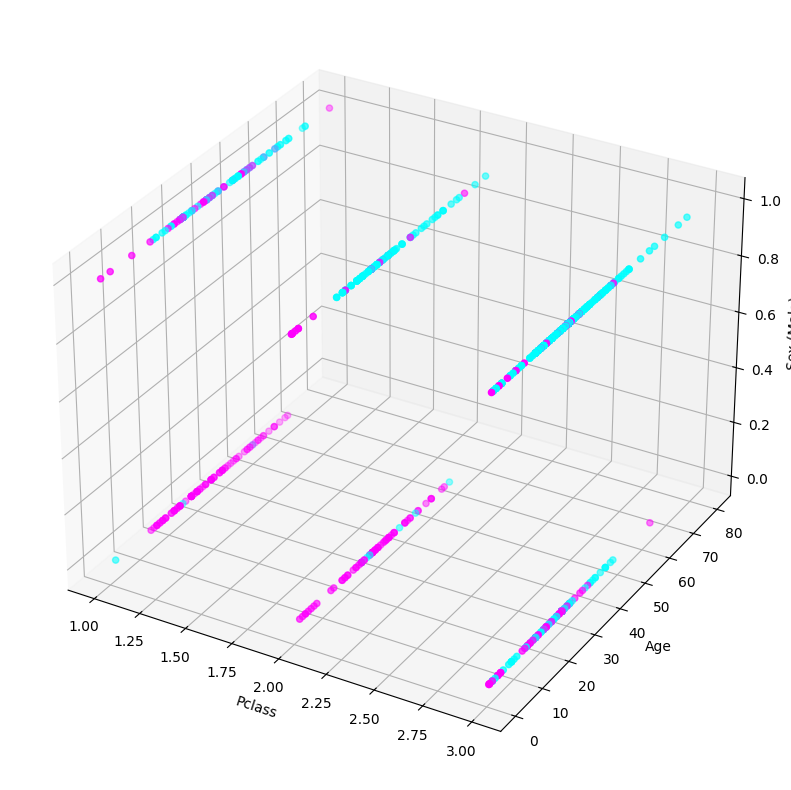

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['Pclass'], X['Age'], X['Sex_male'], c=Y, cmap='cool')
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
ax.set_zlabel('Sex (Male)')
plt.show()


In [11]:
# in the above plot cyan represents 0 and magenta represents 1

X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [12]:
# splitting the data into 80% for training and 20% for testing (generally recommended to do 60-80% for training and 10-20% for testing and 10-20% for validation but we are not using validation set here)

split_percent = int(len(X) * 0.8)

X_train = X_standardized[:split_percent].values
X_test = X_standardized[split_percent:].values
Y_train = Y[:split_percent].values
Y_test = Y[split_percent:].values

In [13]:
# reshaping the matrix

Y_train = Y_train.reshape(len(X_train), 1)
Y_test = Y_test.reshape(len(X_test), 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 3)
(712, 1)
(179, 3)
(179, 1)


In [14]:
covariance_matrix = np.cov(X_train.T)
covariance_matrix

array([[ 1.02246416, -0.33758841,  0.13872701],
       [-0.33758841,  0.98904796,  0.07929626],
       [ 0.13872701,  0.07929626,  0.99225061]])

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[0.60654751 1.35024508 1.04697014]
[[-0.65667664 -0.73853159  0.15279685]
 [-0.65651726  0.65950016  0.36612106]
 [ 0.37116151 -0.14010938  0.91793709]]


In [16]:
# sorting the eigen vectors
indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[indices]
print(eigenvalues)
print(eigenvectors)
total_variance = np.sum(eigenvalues)
print("Variance Ratio:", eigenvalues / total_variance)

[1.35024508 1.04697014 0.60654751]
[[-0.65651726  0.65950016  0.36612106]
 [ 0.37116151 -0.14010938  0.91793709]
 [-0.65667664 -0.73853159  0.15279685]]
Variance Ratio: [0.44951789 0.34855288 0.20192924]


In [17]:
# taking the first 2 eigen vectors only
eigenvectors = eigenvectors[:,:2]
eigenvectors

array([[-0.65651726,  0.65950016],
       [ 0.37116151, -0.14010938],
       [-0.65667664, -0.73853159]])

In [18]:
#transforming the data
X_train_PCA = np.dot(X_train, eigenvectors)
X_test_PCA = np.dot(X_test, eigenvectors)
print(X_train_PCA.shape)
print(X_test_PCA.shape)

(712, 2)
(179, 2)


In [19]:
X_train_SVM = X_train.copy()
X_test_SVM = X_test.copy()
Y_train_SVM = Y_train.copy()
Y_test_SVM = Y_test.copy()
Y_train_SVM = np.where(Y_train == 0, -1, 1)
Y_test_SVM = np.where(Y_test == 0, -1, 1)

In [20]:
class TitanicSVM:
    def __init__(self, learning_rate = 1, iterations = 1000, reg_strength = 1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.reg_strength = reg_strength
        self.w = None
        self.b = None
        self.costs = []
    
    def compute_cost(self, X, Y):
        distances = 1 - Y * (np.dot(X, self.w) - self.b)
        distances[distances < 0] = 0
        hinge_loss = self.reg_strength * np.sum(distances) / len(Y)
        return 0.5 * np.dot(self.w, self.w) + hinge_loss
        
    def fit(self, X, Y):
        m = X.shape[0]  # Number of samples
        n = X.shape[1]  # Number of features
        self.w = np.zeros(n)
        self.b = 0
        for i in range(self.iterations):
            for idx, x_i in enumerate(X): #gives current index and sample. typically used in SGD
                condition = Y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w = self.w - self.learning_rate * (2 * self.reg_strength * self.w)
                else:
                    self.w = self.w - self.learning_rate * (2 * self.reg_strength * self.w - Y[idx] * x_i)
                    self.b = self.b - self.learning_rate * Y[idx]
            cost = self.compute_cost(X, Y)
            self.costs.append(cost)
            if (i % 100 == 0):
                print("The iteration is", i, "and cost is", cost)


    def predict(self, X):
        predictions = np.dot(X, self.w) - self.b
        return np.sign(predictions)
    
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def confusion_matrix(self, y_true, y_pred,class_labels):
        TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
        TN = np.sum((y_true == -1) & (y_pred == -1))  # True Negatives
        FP = np.sum((y_true == -1) & (y_pred == 1))  # False Positives
        FN = np.sum((y_true == 1) & (y_pred == -1))  # False Negatives
        conf_matrix = np.array([[TP, FN], [FP, TN]])
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix,annot=True,cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.title("Confusion Matrix")
        plt.show()

In [21]:

class TitanicSurvivalLogisticRegression:
    def __init__(self, learning_rate= 1, iterations= 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = 0
        self.losses = []
        
    def sigmoid(self, x):
        x = x.astype(float)
        return 1 / (1 + np.exp(-x))
        
    def gradient_descent(self, X_train, Y_train):

        m = X_train.shape[0]  # Total number of samples
        n = X_train.shape[1]  # Total number of features

        self.w = np.zeros((n, 1))
        self.b = 0

        for i in range(self.iterations):
            z = np.dot(X_train, self.w) + self.b
            a = self.sigmoid(z)  # use this to make predictions
            
            w_derivative = (1 / m) * np.dot(X_train.T, (a - Y_train))
            b_derivative = (1 / m) * np.sum(a - Y_train)
            
            self.w = self.w - self.learning_rate * w_derivative
            self.b = self.b - self.learning_rate * b_derivative
            
            loss = -(1/m) * np.sum(Y_train * np.log(a) + (1 - Y_train) * np.log(1 - a))
            self.losses.append(loss)
            
            if (i % 500 == 0):
                print("The iteration is", i, "and loss is", loss)

        return self.w, self.b, self.losses

    def predict(self, X_train, threshold = 0.5):
        X_train_predict = X_train
        z = np.dot(X_train_predict, self.w) + self.b
        predictions = self.sigmoid(z)
        survival_predictions = []
        for prob in predictions:
            if prob >= threshold:
                survival_predictions.append(1)  
            else:
                survival_predictions.append(0)
        return np.array(survival_predictions)

    def accuracy(self, y_true, y_pred):
        print(y_true.shape)
        return np.mean(y_true == y_pred)

    def f1_score(self, y_true, y_pred):
        true_positive = np.sum((y_true == 1) & (y_pred == 1))
        false_positive = np.sum((y_true == 0) & (y_pred == 1))
        false_negative = np.sum((y_true == 1) & (y_pred == 0))
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1 = 2 * (precision * recall) / (precision + recall)
        return precision, recall, f1


In [22]:
# RESULTS WITHOUT PCA

The iteration is 0 and cost is 0.09859070019465002
The accuracy without PCA is: 82.68 %
Confusion Matrix without PCA:


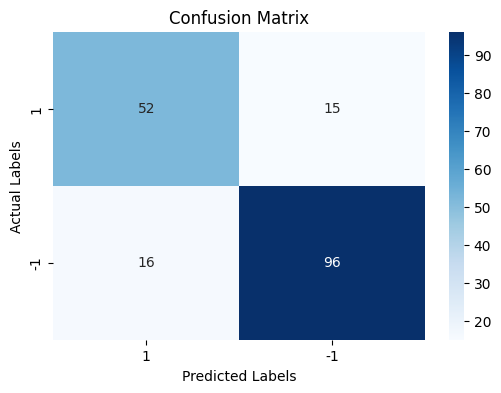

Cost vs. Iteration without PCA:


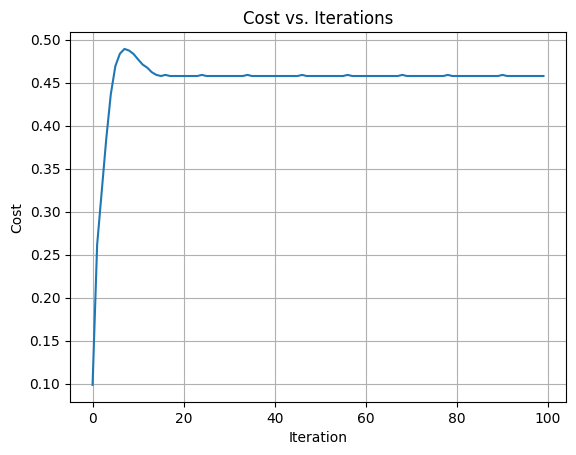

In [23]:
titanicSVM = TitanicSVM(0.001, 100, 0.0000000001)
titanicSVM.fit(X_train_SVM, Y_train_SVM)

Y_pred = titanicSVM.predict(X_test_SVM)
accuracy = np.mean(Y_pred == Y_test_SVM)
accuracy = titanicSVM.accuracy(Y_test_SVM.flatten(), Y_pred)
print("The accuracy without PCA is:", round(accuracy*100,2),"%")
class_labels= ['1','-1']
print("Confusion Matrix without PCA:")
conf_matrix = titanicSVM.confusion_matrix(Y_test_SVM.flatten(), Y_pred.flatten(),class_labels)
print("Cost vs. Iteration without PCA:")
plt.plot(range(len(titanicSVM.costs)), titanicSVM.costs)
plt.title("Cost vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

The iteration is 0 and loss is 0.6931471805599453
The iteration is 500 and loss is 0.5063108307267524
The iteration is 1000 and loss is 0.4721756030397967
The iteration is 1500 and loss is 0.4621798734335207
The iteration is 2000 and loss is 0.45842079305471994
The iteration is 2500 and loss is 0.45679879551148905
(712,)
The accuracy without PCA is: 78.37 %
Precision without PCA: 0.9688 Recall without PCA: 0.4627 F1 without PCA: 0.6263
Cost vs. Iteration without PCA


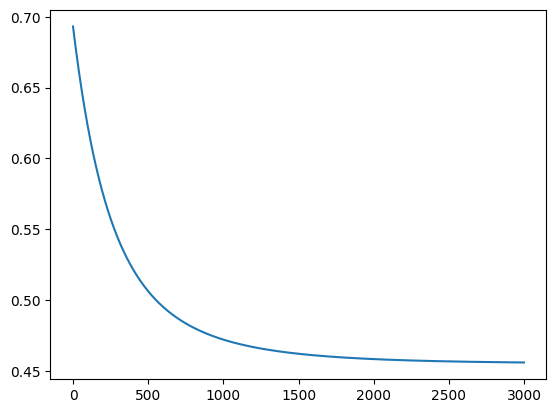

In [24]:
titanicLR = TitanicSurvivalLogisticRegression(learning_rate = 0.008, iterations = 3000)
w, b, losses = titanicLR.gradient_descent(X_train, Y_train)
predictions = titanicLR.predict(X_train, threshold = 0.7) # can use X_test as well
accuracy = titanicLR.accuracy(Y_train.flatten(), predictions)
print("The accuracy without PCA is:", round(accuracy*100,2),"%")
X_test_predict = titanicLR.predict(X_test, threshold = 0.7)
precision, recall, f1 = titanicLR.f1_score(Y_test.flatten(), X_test_predict)
print("Precision without PCA:", round(precision,4), "Recall without PCA:", round(recall,4), "F1 without PCA:", round(f1,4))
print("Cost vs. Iteration without PCA")
range_iterations = np.arange(0, titanicLR.iterations)
plt.plot(range_iterations, losses)
plt.show()

In [25]:
# USING PCA NOW

The iteration is 0 and cost is 70.94590948748777
The iteration is 100 and cost is 67.34872774283593
The iteration is 200 and cost is 67.4535507980524
The iteration is 300 and cost is 67.4469469242463
The iteration is 400 and cost is 67.4401526231605
The iteration is 500 and cost is 67.44113672295887
The iteration is 600 and cost is 67.4403339673938
The iteration is 700 and cost is 67.44009210328224
The iteration is 800 and cost is 67.44003387557476
The iteration is 900 and cost is 67.44001985750816
The accuracy with PCA is: 82.68 %
Confusion Matrix with PCA:


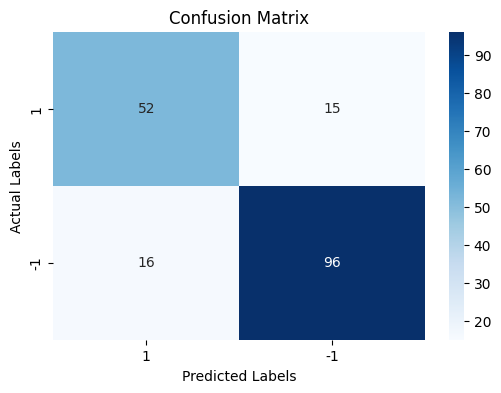

Cost vs. Iteration with PCA:


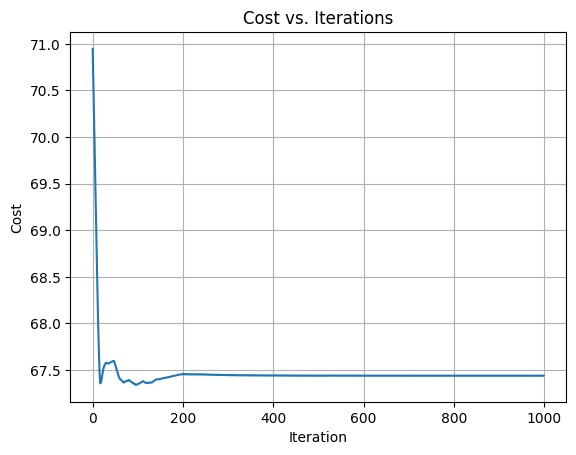

In [26]:
titanicSVM = TitanicSVM(0.0001, 1000, 0.1)
titanicSVM.fit(X_train_PCA, Y_train_SVM)
Y_pred = titanicSVM.predict(X_test_PCA)
accuracy = np.mean(Y_pred == Y_test_SVM)
accuracy = titanicSVM.accuracy(Y_test_SVM.flatten(), Y_pred)
print("The accuracy with PCA is:", round(accuracy*100,2),"%")
class_labels= ['1','-1']
print("Confusion Matrix with PCA:")
conf_matrix = titanicSVM.confusion_matrix(Y_test_SVM.flatten(), Y_pred.flatten(),class_labels)
print("Cost vs. Iteration with PCA:")
plt.plot(range(len(titanicSVM.costs)), titanicSVM.costs)
plt.title("Cost vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

The iteration is 0 and loss is 0.6931471805599453
The iteration is 500 and loss is 0.5364995946353726
The iteration is 1000 and loss is 0.5106818371036254
The iteration is 1500 and loss is 0.504414879172328
The iteration is 2000 and loss is 0.5026031188641736
The iteration is 2500 and loss is 0.5020304220301502
(712,)
The accuracy with PCA is: 75.98 %
Precision with PCA: 0.931 Recall with PCA: 0.403 F1 with PCA: 0.5625
Cost vs. Iteration with PCA


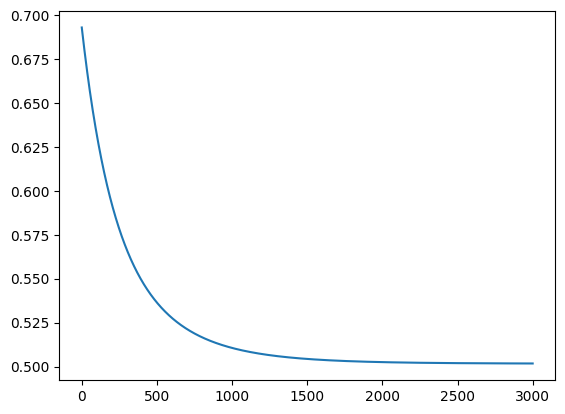

In [27]:
titanicLR = TitanicSurvivalLogisticRegression(learning_rate = 0.008, iterations = 3000)
w, b, losses = titanicLR.gradient_descent(X_train_PCA, Y_train)
predictions = titanicLR.predict(X_train_PCA, threshold = 0.7) # can use X_test as well
accuracy = titanicLR.accuracy(Y_train.flatten(), predictions)
print("The accuracy with PCA is:", round(accuracy*100,2),"%")
X_test_predict = titanicLR.predict(X_test_PCA, threshold = 0.7)
precision, recall, f1 = titanicLR.f1_score(Y_test.flatten(), X_test_predict)
print("Precision with PCA:", round(precision,4), "Recall with PCA:", round(recall,4), "F1 with PCA:", round(f1,4))
print("Cost vs. Iteration with PCA")
range_iterations = np.arange(0, titanicLR.iterations)
plt.plot(range_iterations, losses)
plt.show()